<a href="https://colab.research.google.com/github/tgwon/ai4ml/blob/main/Midterm_ai4ml_2023_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2023 Mid-term exam on Machine Learning for AI

- Name:  
- ID Number:  

------------------------------------------
Copy this notebook to your google drive.  
Good luck! :)


In [ ]:
import pandas as pd
import numpy as np

Downloading datasets

In [ ]:
!gdown --id 1FepWmpic9gRNg-90sijQKLWT2jVc4VDP

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1FepWmpic9gRNg-90sijQKLWT2jVc4VDP
To: /content/nyc_weather_2018.csv
100% 4.36M/4.36M [00:00<00:00, 219MB/s]


In [ ]:
weather = pd.read_csv('nyc_weather_2018.csv').assign(date=lambda x: pd.to_datetime(x.date) )

In [ ]:
weather

,date,datatype,station,attributes,value
0,2018-01-01,PRCP,GHCND:US1CTFR0039,",,N,",0.0
1,2018-01-01,PRCP,GHCND:US1NJBG0015,",,N,",0.0
2,2018-01-01,SNOW,GHCND:US1NJBG0015,",,N,",0.0
3,2018-01-01,PRCP,GHCND:US1NJBG0017,",,N,",0.0
4,2018-01-01,SNOW,GHCND:US1NJBG0017,",,N,",0.0
...,...,...,...,...,...
78775,2018-12-31,WDF5,GHCND:USW00094789,",,W,",130.0
78776,2018-12-31,WSF2,GHCND:USW00094789,",,W,",9.8
78777,2018-12-31,WSF5,GHCND:USW00094789,",,W,",12.5
78778,2018-12-31,WT01,GHCND:USW00094789,",,W,",1.0


### Q1 [10 points] From weather data, try to set 'date' as index.
'date' 변수를 index로 바꿔보세요.

In [ ]:
weather.set_index('date', inplace = True)

### Q2 [10 points] How many unique categories in datatype variable?
datatype 변수에 얼마나 많은 unique한 값들이 있나요?


In [ ]:
len(weather.datatype.unique())

27

### Q3 [15 points] Follow the steps below to get information about SNOW.(아래의 절차들을 수행하여 눈 관련 정보를 알아봅시다.)
 - [5 points] Select only data with datatype 'SNOW'. (datatype 이 'SNOW' 인 데이터들만 선택합니다.)
 - [5 points] Average the numbers ('value') for each day to get the daily snowfall. (각 일자별로 수치('value')들의 평균을 구해서 일별 강설량을 구해보세요.)
 - [5 points] Find the sum of the snowfall for each month and paste it into the daily data. (각 월별로 강설량의 합을 구해서 일별데이터에 붙여보세요.)

 The result should look something like below:

 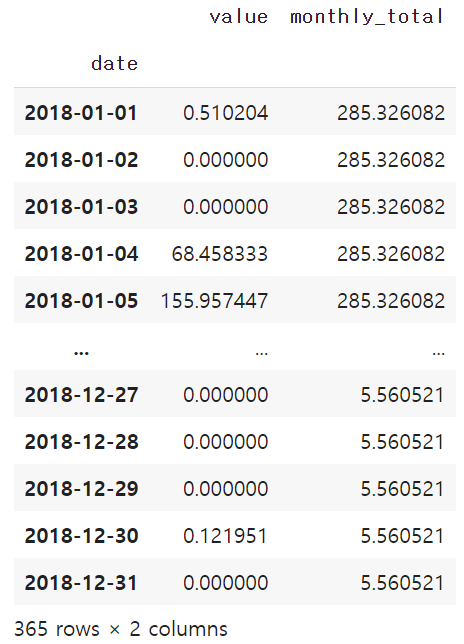

In [ ]:
weather[weather.datatype=='SNOW'].groupby(level=0).value.mean()

date
2018-01-01      0.510204
2018-01-02      0.000000
2018-01-03      0.000000
2018-01-04     68.458333
2018-01-05    155.957447
                 ...    
2018-12-27      0.000000
2018-12-28      0.000000
2018-12-29      0.000000
2018-12-30      0.121951
2018-12-31      0.000000
Name: value, Length: 365, dtype: float64

In [ ]:
weather[weather.datatype=='SNOW'].groupby(level=0).value.mean().to_frame().assign(monthly_total = lambda x: x.groupby(pd.Grouper(freq='M')).transform(np.sum))

,value,monthly_total
date,,
2018-01-01,0.510204,285.326082
2018-01-02,0.000000,285.326082
2018-01-03,0.000000,285.326082
2018-01-04,68.458333,285.326082
2018-01-05,155.957447,285.326082
...,...,...
2018-12-27,0.000000,5.560521
2018-12-28,0.000000,5.560521
2018-12-29,0.000000,5.560521


### Q4 [15 points] Follow the steps below to check for snow days.(아래의 절차들을 수행하여 눈이 온 날들을 확인해 봅시다.)
 - [5 points] Select only data with datatype 'SNOW'. (datatype 이 'SNOW' 인 데이터들만 선택합니다.)
 - [5 points] For each date, indicate if the number ('value') is greater than zero, True, otherwise False. (각 일자별로 수치('value')들이 0보다 큰 경우 True, 아닌경우 False 로 나타내세요.)

The result should look like below:

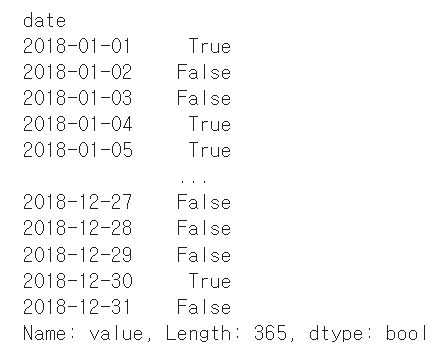

 - [5 points] Calculate the number of snow days per month. (월별로 눈이 온 날들의 수를 계산해보세요.)

The result should look like below:

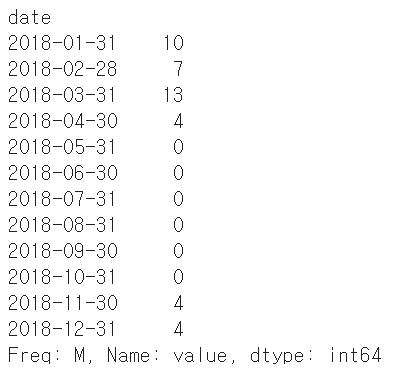

In [ ]:
weather[weather.datatype=='SNOW'].groupby(level=0).value.agg(lambda x: (x>0).any() )

date
2018-01-01     True
2018-01-02    False
2018-01-03    False
2018-01-04     True
2018-01-05     True
              ...  
2018-12-27    False
2018-12-28    False
2018-12-29    False
2018-12-30     True
2018-12-31    False
Name: value, Length: 365, dtype: bool

In [ ]:
weather[weather.datatype=='SNOW'].groupby(level=0).value.agg(lambda x: (x>0).any() ).groupby(pd.Grouper(freq='M')).sum()

date
2018-01-31    10
2018-02-28     7
2018-03-31    13
2018-04-30     4
2018-05-31     0
2018-06-30     0
2018-07-31     0
2018-08-31     0
2018-09-30     0
2018-10-31     0
2018-11-30     4
2018-12-31     4
Freq: M, Name: value, dtype: int64

In [ ]:
weather[weather.datatype=='SNOW'].groupby(level=0).value.agg(lambda x: (x>0).any() ).to_frame().assign(monthly_total_days_snowed = lambda x: x.groupby(pd.Grouper(freq='M')).transform(np.sum))

,value,monthly_total_days_snowed
date,,
2018-01-01,True,10
2018-01-02,False,10
2018-01-03,False,10
2018-01-04,True,10
2018-01-05,True,10
...,...,...
2018-12-27,False,4
2018-12-28,False,4
2018-12-29,False,4


### Q5 [20 points] Let's perform the following tasks on the weather data. (weather 데이터에 대해 다음 작업을 수행해 봅시다.)
- [5 points] Release the date index via reset_index(). (reset_index()를 통해 날짜인덱스를 해제하세요.)
- [5 points] Organize your data in a wide format for values of a datatype. (datatype의 값들에 대해 wide format 으로 데이터를 정리해 보세요.)

The result should look like below:

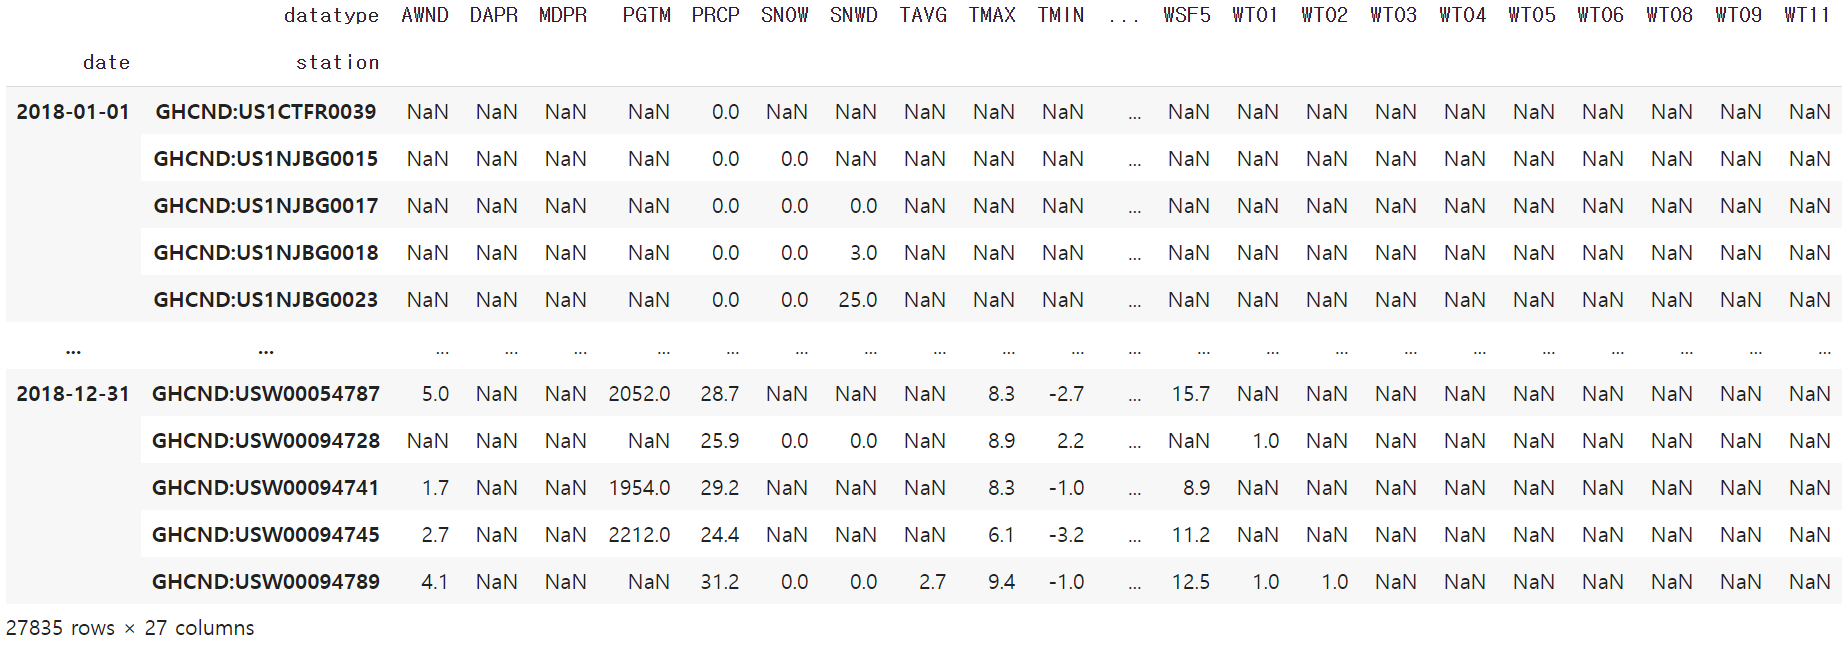

- [5 points] Try performing an aggregation that gets the maximum value for TMAX and minimum value for TMIN by date. (날짜별로 TMAX에 대해서는 최대값, TMIN에 대해서는 최솟값을 가져오는 aggregation을 수행해 보세요. )

The result should look like below:

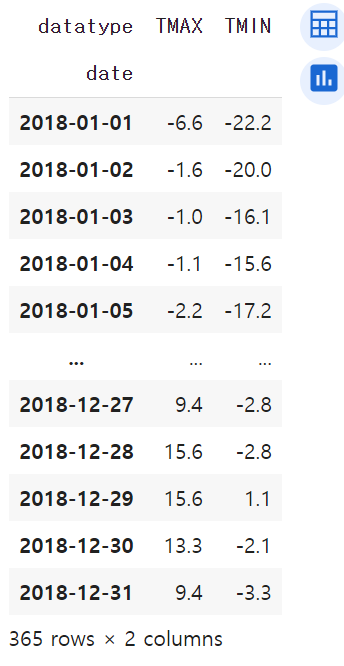

- [5 points] Create a tmax_tmin variable that has a result of TMAX - TMIN. Print 10 results in large order for the tmax_tmin variable. (TMAX - TMIN 의 결과를 갖는 tmax_tmin 변수를 만들어 보세요. tmax_tmin 변수에 대해 큰 순서로 10개 출력해 보세요.)

The result should look like below:

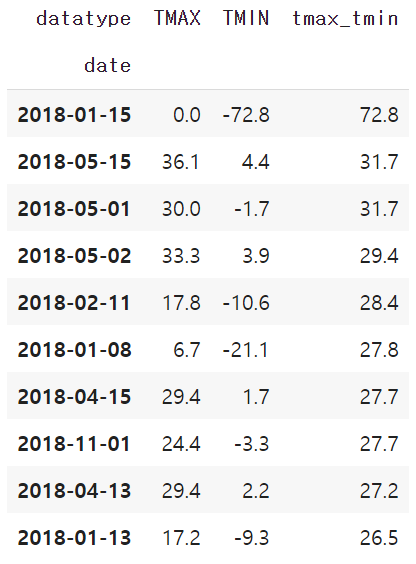

In [ ]:
weather.reset_index().pivot(index = ['date', 'station'], columns = 'datatype', values = 'value')

datatype                      AWND  DAPR  MDPR    PGTM  PRCP  SNOW  SNWD  \
date       station                                                         
2018-01-01 GHCND:US1CTFR0039   NaN   NaN   NaN     NaN   0.0   NaN   NaN   
           GHCND:US1NJBG0015   NaN   NaN   NaN     NaN   0.0   0.0   NaN   
           GHCND:US1NJBG0017   NaN   NaN   NaN     NaN   0.0   0.0   0.0   
           GHCND:US1NJBG0018   NaN   NaN   NaN     NaN   0.0   0.0   3.0   
           GHCND:US1NJBG0023   NaN   NaN   NaN     NaN   0.0   0.0  25.0   
...                            ...   ...   ...     ...   ...   ...   ...   
2018-12-31 GHCND:USW00054787   5.0   NaN   NaN  2052.0  28.7   NaN   NaN   
           GHCND:USW00094728   NaN   NaN   NaN     NaN  25.9   0.0   0.0   
           GHCND:USW00094741   1.7   NaN   NaN  1954.0  29.2   NaN   NaN   
           GHCND:USW00094745   2.7   NaN   NaN  2212.0  24.4   NaN   NaN   
           GHCND:USW00094789   4.1   NaN   NaN     NaN  31.2   0.0   0.0   

datatype                      TAVG  TMAX  TMIN  ...  WSF5  WT01  WT02  WT03  \
date       station                              ...                           
2018-01-01 GHCND:US1CTFR0039   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   
           GHCND:US1NJBG0015   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   
           GHCND:US1NJBG0017   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   
           GHCND:US1NJBG0018   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   
           GHCND:US1NJBG0023   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   
...                            ...   ...   ...  ...   ...   ...   ...   ...   
2018-12-31 GHCND:USW00054787   NaN   8.3  -2.7  ...  15.7   NaN   NaN   NaN   
           GHCND:USW00094728   NaN   8.9   2.2  ...   NaN   1.0   NaN   NaN   
           GHCND:USW00094741   NaN   8.3  -1.0  ...   8.9   NaN   NaN   NaN   
           GHCND:USW00094745   NaN   6.1  -3.2  ...  11.2   NaN   NaN   NaN   
           GHCND:USW00094789   2.7   9.4  -1.0  ...  12.5   1.0   1.0   NaN   

datatype                      WT04  WT05  WT06  WT08  WT09  WT11  
date       station                                                
2018-01-01 GHCND:US1CTFR0039   NaN   NaN   NaN   NaN   NaN   NaN  
           GHCND:US1NJBG0015   NaN   NaN   NaN   NaN   NaN   NaN  
           GHCND:US1NJBG0017   NaN   NaN   NaN   NaN   NaN   NaN  
           GHCND:US1NJBG0018   NaN   NaN   NaN   NaN   NaN   NaN  
           GHCND:US1NJBG0023   NaN   NaN   NaN   NaN   NaN   NaN  
...                            ...   ...   ...   ...   ...   ...  
2018-12-31 GHCND:USW00054787   NaN   NaN   NaN   NaN   NaN   NaN  
           GHCND:USW00094728   NaN   NaN   NaN   NaN   NaN   NaN  
           GHCND:USW00094741   NaN   NaN   NaN   NaN   NaN   NaN  
           GHCND:USW00094745   NaN   NaN   NaN   NaN   NaN   NaN  
           GHCND:USW00094789   NaN   NaN   NaN   NaN   NaN   NaN  

[27835 rows x 27 columns]

In [ ]:
weather.reset_index().pivot(index = ['date', 'station'], columns = 'datatype', values = 'value').groupby('date').agg({'TMAX': 'max', 'TMIN': 'min'})

datatype,TMAX,TMIN
date,,
2018-01-01,-6.6,-22.2
2018-01-02,-1.6,-20.0
2018-01-03,-1.0,-16.1
2018-01-04,-1.1,-15.6
2018-01-05,-2.2,-17.2
...,...,...
2018-12-27,9.4,-2.8
2018-12-28,15.6,-2.8
2018-12-29,15.6,1.1


In [ ]:
weather.reset_index().pivot(index = ['date', 'station'], columns = 'datatype', values = 'value').groupby('date').agg({'TMAX': 'max', 'TMIN': 'min'}).assign(tmax_tmin = lambda x: x.TMAX - x.TMIN).nlargest(10,columns='tmax_tmin')

datatype,TMAX,TMIN,tmax_tmin
date,,,
2018-01-15,0.0,-72.8,72.8
2018-05-15,36.1,4.4,31.7
2018-05-01,30.0,-1.7,31.7
2018-05-02,33.3,3.9,29.4
2018-02-11,17.8,-10.6,28.4
2018-01-08,6.7,-21.1,27.8
2018-04-15,29.4,1.7,27.7
2018-11-01,24.4,-3.3,27.7
2018-04-13,29.4,2.2,27.2


### Q6 [5 points] From the weather data, find the subset of data with 'station' ID names ending in 0039. How many data are there? (weather 데이터에서 station 이름이 0039로 끝나는 데이터들의 부분집합을 구해보세요. 몇 개의 데이터가 있나요? )

The result should look like below:

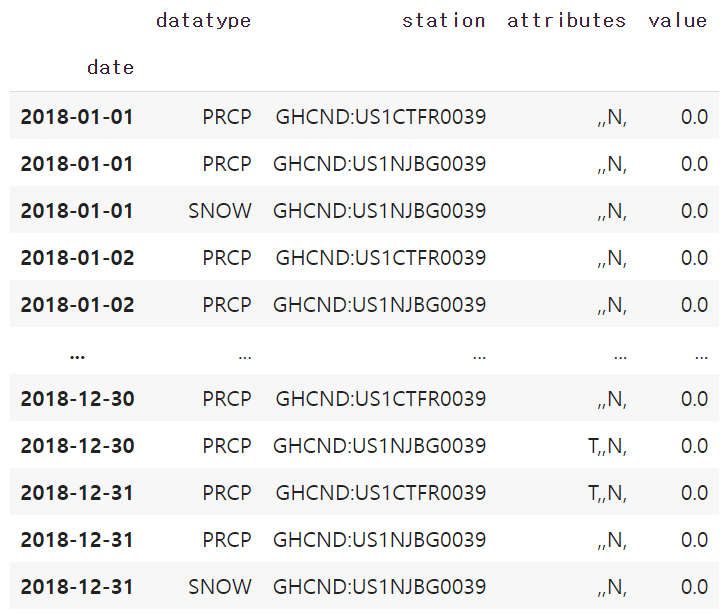

In [ ]:
weather[weather.station.str.contains(r'0039$')]

,datatype,station,attributes,value
date,,,,
2018-01-01,PRCP,GHCND:US1CTFR0039,",,N,",0.0
2018-01-01,PRCP,GHCND:US1NJBG0039,",,N,",0.0
2018-01-01,SNOW,GHCND:US1NJBG0039,",,N,",0.0
2018-01-02,PRCP,GHCND:US1CTFR0039,",,N,",0.0
2018-01-02,PRCP,GHCND:US1NJBG0039,",,N,",0.0
...,...,...,...,...
2018-12-30,PRCP,GHCND:US1CTFR0039,",,N,",0.0
2018-12-30,PRCP,GHCND:US1NJBG0039,"T,,N,",0.0
2018-12-31,PRCP,GHCND:US1CTFR0039,"T,,N,",0.0


## Let's download another dataset (expdata)

In [ ]:
!gdown --id 1gFNrqxEhdFa42AShaqCJbq3kjGXmBXaj


/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1gFNrqxEhdFa42AShaqCJbq3kjGXmBXaj
To: /content/proformer.csv
100% 664/664 [00:00<00:00, 2.84MB/s]


In [ ]:
expdata = pd.read_csv('proformer.csv')
expdata

,dim,AttentionHeads,MacaronBlocks,AvgPooling,H1,H8,H16,H32,H64
0,64,2,1,0.7026,0.7046,0.7011,0.6977,0.6977,0.6943
1,64,2,2,0.7094,0.7086,0.7122,0.7119,0.7136,0.7088
2,64,2,4,0.7140,0.7196,0.7162,0.7184,0.7190,0.7200
3,64,2,8,0.7151,0.7198,0.7223,0.7138,0.7191,0.7214
4,128,4,1,0.7033,0.7153,0.7137,0.7075,0.7069,0.7047
5,128,4,2,0.7164,0.7209,0.7142,0.7197,0.7147,0.7175
6,128,4,4,0.7189,0.7224,0.7207,0.7218,0.7139,0.7192
7,128,4,8,0.0145,0.6627,0.7223,0.7200,0.7207,0.7226
8,256,8,1,0.7109,0.7177,0.7104,0.7124,0.7058,0.7152
9,256,8,2,0.7157,0.7219,0.7197,0.7185,0.7207,0.7177


### Q7 [15 points]  The data is represented in wide format for the variables 'AvgPooling', 'H1', 'H8', 'H16', 'H32', and 'H64'. Let's organize them in long format: the values of 'AvgPooling', 'H1', 'H8', 'H16', 'H32', 'H64' have a variable named 'method', and the value name is 'PearsonR'. (데이터는 'AvgPooling', 'H1', 'H8', 'H16', 'H32', 'H64' 변수들에 대해 wide format으로 표현되어있습니다. 해당 변수들에 대해 long format으로 정리해 봅시다. 'AvgPooling', 'H1', 'H8', 'H16', 'H32', 'H64'의 값들은 method 라는 변수이름을 갖도록 하고, 값의 이름으로는 'PearsonR'로 설정해 주세요. )

The result should look like below:

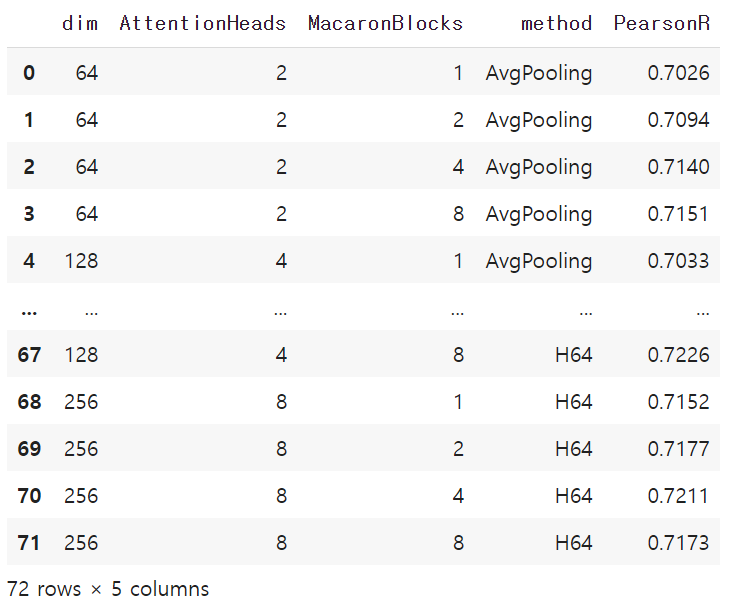

In [ ]:
expdata1 = expdata.melt(id_vars=['dim', 'AttentionHeads', 'MacaronBlocks'],  value_vars = ['AvgPooling', 'H1', 'H8', 'H16', 'H32', 'H64'], var_name="method", value_name = "PearsonR")

In [ ]:
expdata1

,dim,AttentionHeads,MacaronBlocks,method,PearsonR
0,64,2,1,AvgPooling,0.7026
1,64,2,2,AvgPooling,0.7094
2,64,2,4,AvgPooling,0.7140
3,64,2,8,AvgPooling,0.7151
4,128,4,1,AvgPooling,0.7033
...,...,...,...,...,...
67,128,4,8,H64,0.7226
68,256,8,1,H64,0.7152
69,256,8,2,H64,0.7177
70,256,8,4,H64,0.7211


### Q8 [5 points] Take a subset of the cases where the variable 'method' has the values 'H8', 'H16', 'H32', and 'H64' and save it as data named 'res1'. ('method' 변수가 'H8', 'H16', 'H32', 'H64' 값을 갖는 경우의 데이터로 부분집합을 취해서 'res1'이라는 데이터로 저장해 보세요.)

If you don't get the answer to Q7, assume you did, and write down the code. I will give you credit if the answer is correct. (Q7의 답을 구하지 못한 경우도, 답을 구했다고 가정하고, 코드를 적어서 코드가 맞으면 정답으로 인정해줍니다. )


In [ ]:
res1 = expdata1[expdata1.method.isin(['H8', 'H16', 'H32', 'H64'])]
res1

,dim,AttentionHeads,MacaronBlocks,method,PearsonR
24,64,2,1,H8,0.7011
25,64,2,2,H8,0.7122
26,64,2,4,H8,0.7162
27,64,2,8,H8,0.7223
28,128,4,1,H8,0.7137
29,128,4,2,H8,0.7142
30,128,4,4,H8,0.7207
31,128,4,8,H8,0.7223
32,256,8,1,H8,0.7104
33,256,8,2,H8,0.7197


If we calculated res1 correctly, we can use seaborn to visualize it in a violin plot as shown below. (res1을 바르게 계산했다면 seaborn을 이용하여 아래와 같이 violin plot으로 시각화 시킬 수 있습니다.)

<Axes: xlabel='MacaronBlocks', ylabel='PearsonR'>

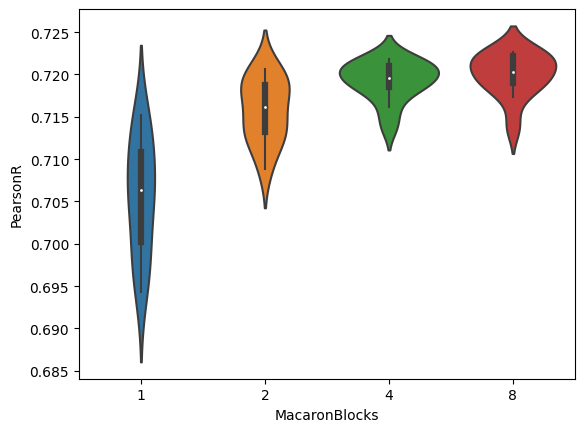

In [ ]:
import seaborn as sns
sns.violinplot(res1, x = 'MacaronBlocks', y = 'PearsonR')